In [3]:
from contextlib import contextmanager,redirect_stderr,redirect_stdout
from os import devnull

@contextmanager
def suppress_stdout_stderr():
    """A context manager that redirects stdout and stderr to devnull"""
    with open(devnull, 'w') as fnull:
        with redirect_stderr(fnull) as err, redirect_stdout(fnull) as out:
            yield err, out

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fifo import startSimulation as fifo
from helper import print_sim_results

from ticket import startSimulation as ticket
RANDOM_SEED = 42
### problem parameters ####
fixed_parameters = {
    "order_time_mu" : 2,
    "order_time_min" : 1,
    "food_prepare_mu" : 2,
    "food_prepare_min" : 1,
    "lamb" : 2 #smaller means lower rate of ppl arriving
}
n_kitchen = 5
n_counter = 5
n_customer = 1010
SIM_TIME = 10000


column_names = ["Arrival Time","Current Q Length","Q time",
                "Service Start Time","Food prepare start","Exit system time",
                "Food Prepare Duration","Total Wait Time(Queue+Food)","Service Time",
                "Total Time in System"]

In [2]:
with suppress_stdout_stderr():
    ticket_results = ticket(n_customer,n_counter,n_kitchen,SIM_TIME,fixed_parameters)
    fifo_results = fifo(n_customer,n_counter,n_kitchen,SIM_TIME,fixed_parameters) 

In [3]:
# print("Ticket")
print_sim_results(ticket_results,n_kitchen,n_counter)
# ticket_results[0].iloc[:500]
# (ticket_results[0].iloc[:,4] -  ticket_results[0].iloc[:,3]).sum()


1000 Customers served
Total Simulation Time=> 513.10 Minutes
Total Idle Time for 5 Counters=> 47850.80 Minutes
Total Service Time for 5 Counters=> 2149.10 Minutes
Average Queue Length=> 5 
Max Queue Length=> 27 

Average Waiting Time => 4.65 Minutes
Average Service Time => 2.15 Minutes
Average Time Spent In System => 8.51 Minutes


In [4]:
print("Fifo")
print_sim_results(fifo_results,n_kitchen,n_counter)

Fifo

1000 Customers served
Total Simulation Time=> 909.30 Minutes
Total Idle Time for 5 Counters=> 2195.20 Minutes
Total Service Time for 5 Counters=> 4515.56 Minutes
Average Queue Length=> 223 
Max Queue Length=> 450 

Average Waiting Time => 205.01 Minutes
Average Service Time => 4.51 Minutes
Average Time Spent In System => 207.33 Minutes


In [5]:
parameters = {
    "order_time_mu" : 1.5,
    "order_time_min" : 1,
    "food_prepare_mu" : 1.5,
    "food_prepare_min" : 1,
    "lamb" : 3 #smaller means lower rate of ppl arriving
}

In [6]:
val_lamb = np.arange(1.0,12.0, 0.1)

service_rate_3 = np.zeros([len(val_lamb),2])
service_rate_5 = np.zeros([len(val_lamb),2])
n_kitchen = 3
n_counter = 2
with suppress_stdout_stderr():
    for i in range(len(val_lamb)):
        parameters["lamb"] = val_lamb[i]
        ticket_results3 = ticket(n_customer,n_counter,n_kitchen,SIM_TIME,parameters)
        fifo_results3 = fifo(n_customer,n_counter,n_kitchen,SIM_TIME,parameters)
        
        total_counter_sim_ticket3 =(n_counter*ticket_results3[6])
        total_counter_sim_fifo3 =(n_counter*fifo_results3[6])

        service_rate_3[i]=[ticket_results3[4] /total_counter_sim_ticket3, (fifo_results3[4] - fifo_results3[5])/total_counter_sim_fifo3]


In [1]:
service_rate3 =np.divide(service_rate_3,service_rate_3.max(axis = 0)) *100

NameError: name 'np' is not defined

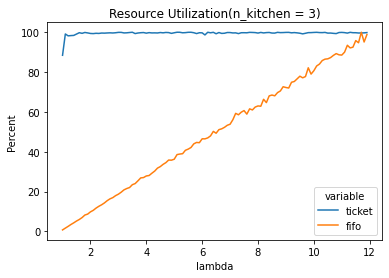

In [29]:
pd_rho3 = pd.DataFrame(service_rate3,columns=["ticket","fifo"],index=val_lamb)
pd_rho3["lambda"] = val_lamb

plt.title('Resource Utilization(n_kitchen = %s)' %n_kitchen)
plt.ylabel("Percent")
sns.lineplot(data=pd.melt(pd_rho3,['lambda']), x="lambda",y="value",hue="variable")
plt.savefig('../images/utilization_percentage.png')

In [9]:
val_lamb = np.arange(1.0,12.0, 0.1)
avg_waiting = np.zeros([len(val_lamb),2])
avg_system = np.zeros([len(val_lamb),2])
avg_no_customer_waiting = np.zeros([len(val_lamb),2])
simulation_time_for_1000 = np.zeros([len(val_lamb),2])
with suppress_stdout_stderr():
    for i in range(len(val_lamb)):
        parameters["lamb"] = val_lamb[i]
        ticket_results = ticket(n_customer,n_counter,n_kitchen,SIM_TIME,parameters)
        fifo_results = fifo(n_customer,n_counter,n_kitchen,SIM_TIME,parameters)

        avg_waiting[i] =[ticket_results[0].iloc[:,7].mean(), fifo_results[0].iloc[:,7].mean()]
        avg_system[i] =[ticket_results[0].iloc[:,9].mean(), fifo_results[0].iloc[:,9].mean()]
        avg_no_customer_waiting[i] = [ticket_results[0].iloc[:,1].mean(), fifo_results[0].iloc[:,1].mean()]
        simulation_time_for_1000[i] = [ticket_results[-1], fifo_results[-1]]

In [13]:
df_avg_total_wait = pd.DataFrame(avg_waiting,columns=["ticket","fifo"],index=val_lamb)
df_avg_total_wait['lambda'] = val_lamb
df_avg_system_time = pd.DataFrame(avg_system,columns=["ticket","fifo"],index=val_lamb)
df_avg_system_time['lambda'] = val_lamb
df_avg_no_customer_waiting = pd.DataFrame(avg_no_customer_waiting,columns=["ticket","fifo"],index=val_lamb)

df_total_time_sim = pd.DataFrame(simulation_time_for_1000,columns=["ticket","fifo"],index=val_lamb)
df_total_time_sim['lambda'] = val_lamb

In [11]:
parameters["lamb"]  = fixed_parameters["lamb"] #reset
# df_avg_total_wait

In [12]:
val_mu = np.arange(30.0,1.0, -0.5)
avg_waiting_fix_mu = np.zeros([len(val_mu),2])
avg_system_fix_mu = np.zeros([len(val_mu),2])
avg_no_customer_waiting_fix_mu = np.zeros([len(val_mu),2])
with suppress_stdout_stderr():
    for i in range(len(val_mu)):
        parameters["order_time_mu"] = val_mu[i]
        parameters["food_prepare_mu"] = val_mu[i]
        ticket_results = ticket(n_customer,n_counter,n_kitchen,SIM_TIME,parameters)
        fifo_results = fifo(n_customer,n_counter,n_kitchen,SIM_TIME,parameters) 
        
        avg_waiting_fix_mu[i] =[ticket_results[0].iloc[:,7].mean(), fifo_results[0].iloc[:,7].mean()]
        avg_system_fix_mu[i] =[ticket_results[0].iloc[:,9].mean(), fifo_results[0].iloc[:,9].mean()]
        avg_no_customer_waiting_fix_mu[i] = [ticket_results[0].iloc[:,1].mean(), fifo_results[0].iloc[:,1].mean()]


In [12]:
parameters["order_time_mu"] = 1.5
df_avg_total_wait_fix_mu = pd.DataFrame(avg_waiting_fix_mu,columns=["ticket","fifo"])
df_avg_total_wait_fix_mu["mu"] = val_mu
df_avg_system_time_fix_mu = pd.DataFrame(avg_system_fix_mu,columns=["ticket","fifo"])
df_avg_system_time_fix_mu["mu"] = val_mu
df_avg_no_customer_waiting_fix_mu = pd.DataFrame(avg_no_customer_waiting_fix_mu,columns=["ticket","fifo"])

NameError: name 'avg_waiting_fix_mu' is not defined

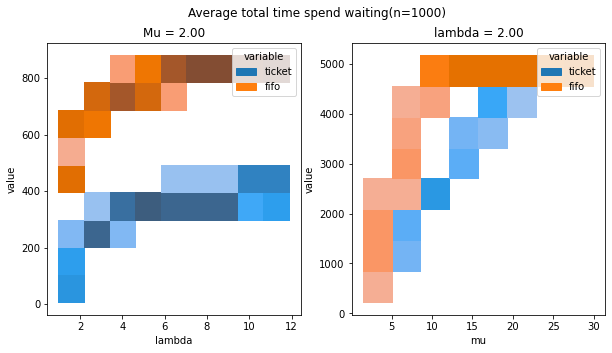

In [14]:
fig, ax =plt.subplots(1,2, sharey = False,figsize = (10,5))
sns.histplot(data=pd.melt(df_avg_total_wait,['lambda']),ax=ax[0],kde=True,element="step",x="lambda",y="value",hue="variable",)
# ax[0].plot(r,fit=True)
sns.histplot(data=pd.melt(df_avg_total_wait_fix_mu,['mu']),ax=ax[1],kde=True,stat="probability",element="step",x="mu",y="value",hue="variable")
fig.suptitle("Average total time spend waiting(n=1000)")
# ax[0].set(xlabel="variable lambda plot")
# ax[1].set(xlabel="variable mu plot")
ax[0].set_title('Mu = %.2f' %fixed_parameters["order_time_mu"])

ax[1].set_title("lambda = %.2f" %fixed_parameters["lamb"])
plt.show()
# plt.xlabel("lambda")
fig.savefig('../images/mean_waiting.png')
# plt.title(" againts lambda")
# plt.xlabel("lambda")
# plt.ylabel("Avg total waiting time (min)")


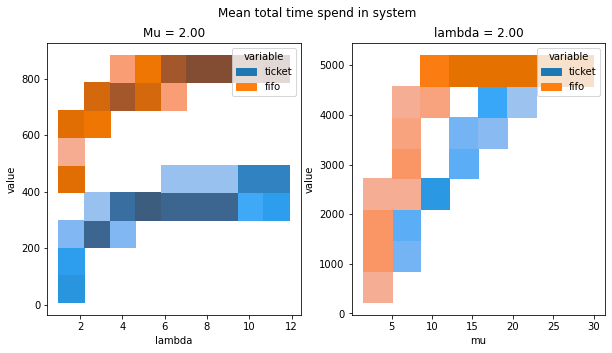

In [19]:
fig, ax =plt.subplots(1,2, sharey=False,figsize = (10,5))
sns.histplot(data=pd.melt(df_avg_system_time,["lambda"]),ax=ax[0],stat="probability",kde=True,element="step",x="lambda",y="value",hue="variable",)
sns.histplot(data=pd.melt(df_avg_system_time_fix_mu,["mu"]),ax=ax[1],stat="probability",kde=True,element="step",x="mu",y="value",hue="variable",)
ax[0].set_title('Mu = %.2f' %fixed_parameters["order_time_mu"])
ax[1].set_title("lambda = %.2f" %fixed_parameters["lamb"])
ax[0].set(xlabel="lambda")
ax[1].set(xlabel="mu")
plt.suptitle("Mean total time spend in system")
plt.show()
# plt.xlabel("lambda")
fig.savefig('../images/mean_time_in_system.png')


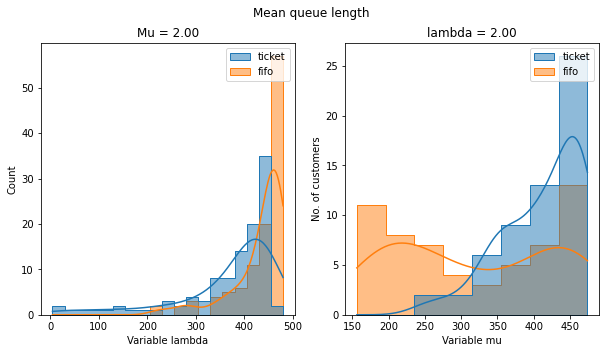

In [23]:
fig, ax =plt.subplots(1,2, sharey=False,figsize = (10,5))
sns.histplot(data=df_avg_no_customer_waiting,ax=ax[0],kde=True,element="step",)
sns.histplot(data=df_avg_no_customer_waiting_fix_mu,ax=ax[1],kde=True,element="step")
ax[0].set_title('Mu = %.2f' %fixed_parameters["order_time_mu"])
ax[1].set_title("lambda = %.2f" %fixed_parameters["lamb"])
ax[0].set(xlabel="Variable lambda")
ax[1].set(xlabel="Variable mu")
plt.suptitle("Mean queue length")

plt.ylabel("No. of customers")

fig.savefig('../images/mean_queue_length.png')

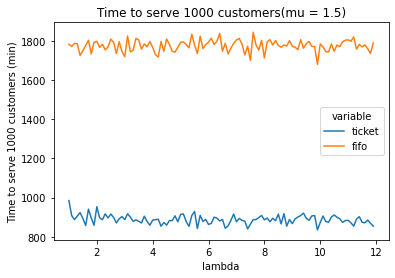

In [20]:
# Time to finish 1000 customers
df_total_time_sim
sns.lineplot(data=pd.melt(df_total_time_sim,["lambda"]),x="lambda",y="value",hue="variable",)
plt.ylabel("Time to serve 1000 customers (min)")
plt.title('Time to serve 1000 customers(mu = 1.5)')
plt.savefig('../images/time_to_1000.png')